<h1>Лаба №4</h1>
<h2>Студента БС-83</h2>
<h2>Кльоміна Павла</h2>

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set_style("whitegrid")

Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [10]:
Data = [];
for i in range(6):
    if (i < 3):
        ran=sorted(np.random.normal(0, 1, size = 20))
        Data.append(ran)
    else:
        ran=sorted(np.random.triangular(0, 0.1, 1, size = 20))
        Data.append(ran)
for i in Data:
    print(str(i)+'\n')

[-2.4172982834527588, -1.4911898505642474, -0.9979506849650323, -0.46308267577182805, -0.26652096220860555, -0.21632623897138825, -0.20118939619744594, 0.14238976841936118, 0.346668040216919, 0.3921826327242441, 0.588526843758079, 0.6951992976005666, 1.0223631342992872, 1.1076256600285896, 1.159844698331698, 1.2660522319189755, 1.4156663047938647, 1.5169250876383553, 1.9509332719635097, 2.2029861065205036]

[-1.9013023891697935, -1.842054994747484, -1.1071389538708025, -0.7954118010363064, -0.7834333550734605, -0.7535365368122406, -0.6805662849396286, -0.5789328110686824, -0.3169750577348395, -0.25547201081108595, -0.14934178430993775, -0.11705452039492228, 0.6257669010121301, 0.6945703343705132, 0.7080843745268055, 0.9299785332571182, 0.9800882732341062, 1.2036633930221536, 2.094818312922395, 2.1563009219244504]

[-2.864986916627759, -0.9502459681868297, -0.7684533948167764, -0.5226437917697948, -0.20183674205208343, -0.20007539793126594, -0.04620260142538191, -0.008514006425887169, 0

In [11]:
def schapiro_uilk(array,n):
    a = pd.read_excel("Coeficients for the W test for normality.xlsx")[n]/10000
    w_table = pd.read_excel("Рoints of the distribution of W.xlsx")[ 'Unnamed: 1'][n]/1000

    k = int(n/2 if (n%2==0) else (n-1)/2)
    m = np.mean(array)
    nm = 0
    for i in array:
        nm += (i-m)**2

    b = 0
    for i in range(k):
        b += a[i]*(array[n-i-1] - array[i])
    w = (b**2)/nm
    
    if(w > w_table):
       
        return "normal"
    else:
        
        return "non-normal"

(0.0, 1.0, 0.0, 1.0)

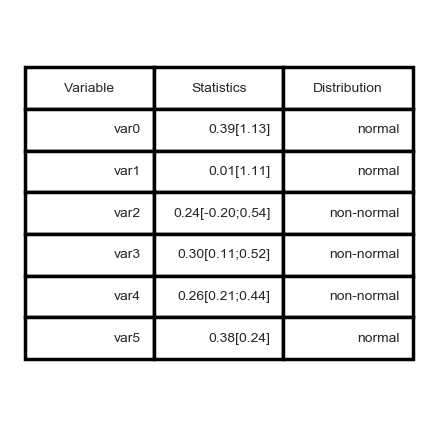

In [15]:
table_st = pd.DataFrame({
    'Variable': [("var"+str(i)) for i in range(6)], 
    'Statistics':
        ['%.2f[%.2f]' % (np.mean(Data[i]),np.std(Data[i]))
             if (schapiro_uilk(Data[i],20)=="normal") else 
         '%.2f[%.2f;%.2f]' % (np.median(Data[i]), np.quantile(Data[i],0.25),np.quantile(Data[i],0.75)) 
         for i in range(6)]
    , 
    'Distribution':[schapiro_uilk(Data[i],20) for i in range(6)]
})
    
fig = plt.figure(figsize=(2,2), dpi=250)
ax=fig.add_subplot(111)
cell_text = []
for row in range(len(table_st)):
    cell_text.append(table_st.iloc[row])

ax.table(cellText=cell_text, colLabels=table_st.columns, loc='center')
ax.axis('off')

Збереження Файлу

In [17]:
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(fig)
pdf.close()